In [4]:
import cv2
import matplotlib.pyplot as plt
img1 = cv2.imread('Computer-Vision-with-Python/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

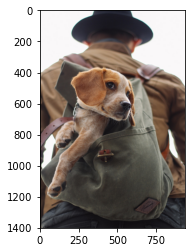

In [5]:
plt.imshow(img1)

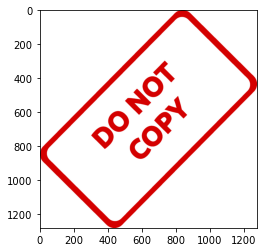

In [6]:
plt.imshow(img2)

# This pictures are not the same size!


In [7]:
img1.shape == img2.shape

False

In [9]:
# BLENDING Images of the same size
img1 = cv2.resize(img1,(1200,1200))

In [10]:
img2 = cv2.resize(img2,(1200,1200))

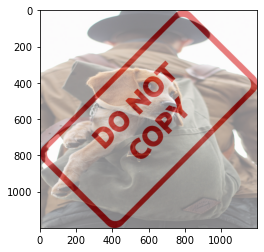

In [11]:
# the add weighted method only works when they are the same size
blended = cv2.addWeighted(src1=img1,alpha=0.5,src2=img2,beta=0.5,gamma=0)
plt.imshow(blended)

In [16]:
# Overlay a small image on top of a larger image with no blending.

img1 = cv2.imread('Computer-Vision-with-Python/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
# Numpy reassignment. 

# Change to a smaller size on all coordinates than image 1
img2 = cv2.resize(img2,(600,600))

# Relabel
large_img = img1
small_img = img2

# Markers of where image starts
x_offset = 0
y_offset = 0

# Markers of where image ends
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

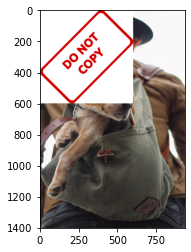

In [17]:
large_img[y_offset:y_end,x_offset:x_end] = small_img
plt.imshow(large_img)

In [18]:
# Blend Together

img1 = cv2.imread('Computer-Vision-with-Python/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2,(600,600))

In [21]:
# finding a ROI or Region of Interest
x_offset = img1.shape[1] - 600
y_offset = img1.shape[0] - 600

rows,cols,channels = img2.shape

In [22]:
rows

600

In [23]:
cols

600

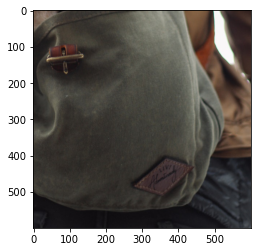

In [26]:
# ROI
roi = img1[y_offset:1401,x_offset:943]
plt.imshow(roi)

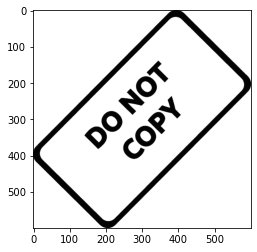

In [27]:
# Creating a mask
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray, cmap="gray")


In [31]:
# we need to invert this picture
mask_inv = cv2.bitwise_not(img2gray)

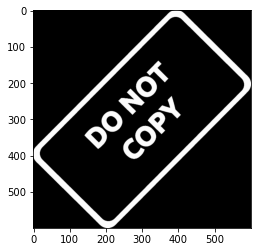

In [32]:
plt.imshow(mask_inv,cmap='gray')

In [33]:
# Creating a white background
import numpy as np
white_background = np.full(img2.shape,255,dtype=np.uint8)

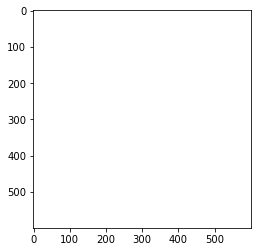

In [34]:
plt.imshow(white_background)

In [35]:
 bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

In [36]:
bk.shape

(600, 600, 3)

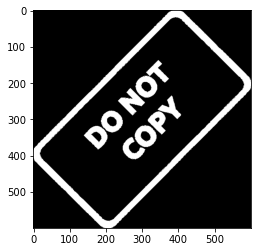

In [37]:
plt.imshow(bk)

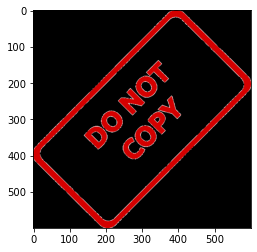

In [38]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)
plt.imshow(fg)

In [39]:
# finally the final
final_roi = cv2.bitwise_or(roi, fg)

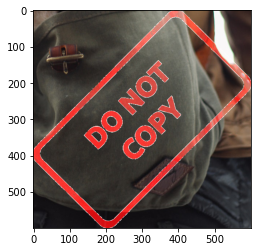

In [40]:
plt.imshow(final_roi)

In [41]:
large_img = img1 
small_img = final_roi

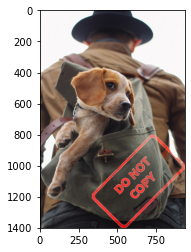

In [42]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)